In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Define the ols_estimator function
def ols_estimator(X, y):
    """
    Computes the OLS estimator for linear regression.
    
    Parameters:
    X (numpy.ndarray): Matrix of independent variables (features) with shape (n_samples, n_features).
    y (numpy.ndarray): Vector of dependent variable values with shape (n_samples,).
    
    Returns:
    numpy.ndarray: Vector of estimated beta coefficients.
    """
    # Add a column of ones to X for the intercept term
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Compute the beta values without regularization, assuming X.T @ X is invertible
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return beta

In [8]:
X = np.array([[1, 2], [2, 3], [3, 5], [4, 7]])  # Independent variables (now linearly independent)
y = np.array([5, 7, 9, 11])                      # Dependent variable

print("Independent variable matrix X:\n", X)
print("Dependent variable vector y:\n", y)
# Calculate beta coefficients
beta_values = ols_estimator(X, y)
print("Beta values:", beta_values)

Independent variable matrix X:
 [[1 2]
 [2 3]
 [3 5]
 [4 7]]
Dependent variable vector y:
 [ 5  7  9 11]
Beta values: [3.00000000e+00 2.00000000e+00 1.59872116e-14]


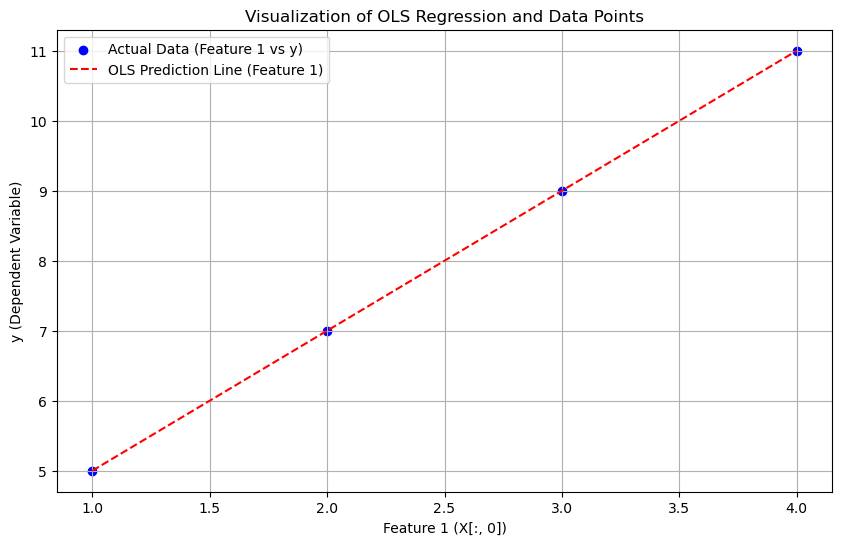

In [11]:
beta_values = ols_estimator(X, y)

x1 = X[:, 0]  # First feature
x2 = X[:, 1]  # Second feature
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
y_pred = X_with_intercept @ beta_values

plt.figure(figsize=(10, 6))
plt.scatter(x1, y, color="blue", label="Actual Data (Feature 1 vs y)")
plt.plot(x1, y_pred, color="red", linestyle="--", label="OLS Prediction Line (Feature 1)")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("y (Dependent Variable)")
plt.legend()
plt.title("Visualization of OLS Regression and Data Points")
plt.grid(True)
plt.show()

Estimated beta values: [ 4.47002911  2.55560082 -1.23155244  3.41408115]
True beta values: [ 5.   2.5 -1.2  3.3]


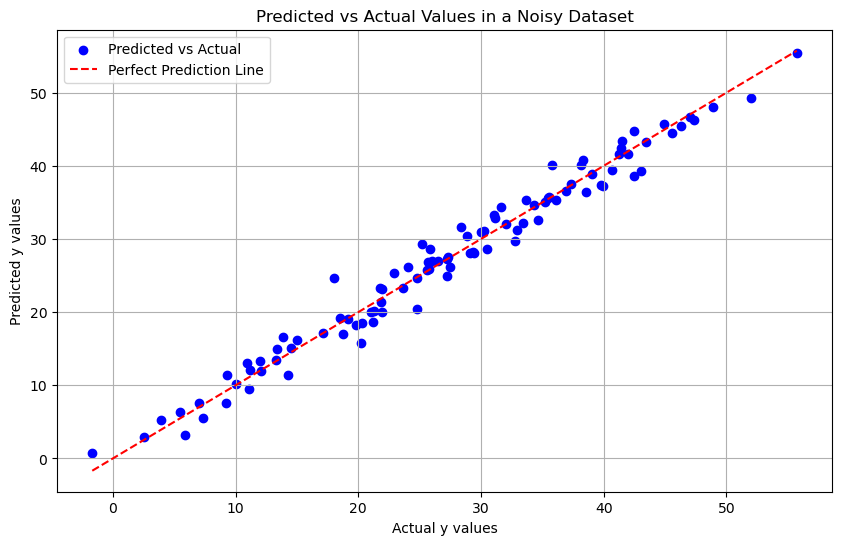

In [13]:
np.random.seed(42)
n_samples = 100
n_features = 3

X = np.random.rand(n_samples, n_features) * 10
true_beta = np.array([2.5, -1.2, 3.3])
y = X @ true_beta + 5 + np.random.normal(0, 2, n_samples)

def ols_estimator(X, y):
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

beta_values = ols_estimator(X, y)
print("Estimated beta values:", beta_values)
print("True beta values:", np.array([5] + list(true_beta)))

X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
y_pred = X_with_intercept @ beta_values

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual y values")
plt.ylabel("Predicted y values")
plt.legend()
plt.title("Predicted vs Actual Values in a Noisy Dataset")
plt.grid(True)
plt.show()